# Appendix

### Libraries Required:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## A1) Histogram Equalization

In [2]:
image = cv2.imread('indoors.png', cv2.IMREAD_GRAYSCALE)

In [3]:
original_image = Image.open('indoors.png')
resized_image = original_image.resize((256, 256))
im = np.array(resized_image.convert('L'))
image = ((im - np.min(im)) * (1/(np.max(im) - np.min(im)) * 255)).astype('uint8')

In [4]:
def create_pdf(im_in):
    # Create normalized intensity histogram from an input image
    unNorm_hist = [0] * 256
    number_of_pixels=0
    for row in im_in:
        for pixel in row:
            unNorm_hist[pixel] += 1
            number_of_pixels+=1
    pdf = [(freq / number_of_pixels) for freq in unNorm_hist]
    return pdf

In [5]:
def create_cdf(pdf):
    # Create the cumulative distribution function from an input pdf
    cdf = [sum(pdf[:i+1]) for i in range(len(pdf))]
    return cdf

In [6]:
def histogram_equalization(im_in):
    pdf = create_pdf(im_in)
    cdf = create_cdf(pdf) 
    equalized_im = np.zeros_like(im_in)

    for i in range(im_in.shape[0]):
        for j in range(im_in.shape[1]):
            pixel_value = im_in[i, j]
            equalized_pixel = int(255 * cdf[pixel_value])
            equalized_im[i, j] = equalized_pixel
    # Create a histogram equalized image using your computed cdf
    return equalized_im

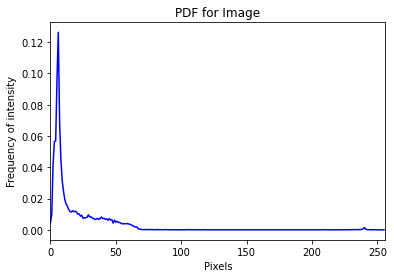

In [7]:
pdf = create_pdf(image)

plt.plot(pdf, color='b')
plt.xlim([0, 256])
plt.title('PDF for Image')
plt.xlabel('Pixels')
plt.ylabel('Frequency of intensity')
plt.show()


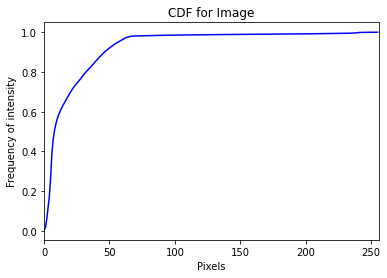

In [8]:
cdf = create_cdf(pdf)

plt.plot(cdf, color='b')
plt.xlim([0, 256])
plt.title('CDF for Image')
plt.xlabel('Pixels')
plt.ylabel('Frequency of intensity')
plt.show()

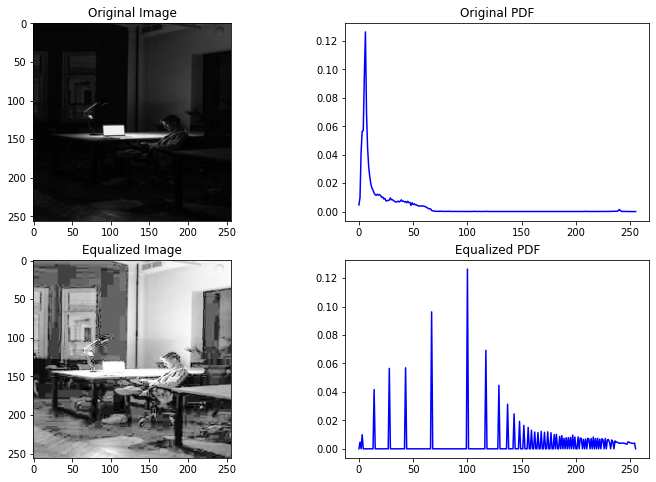

In [9]:
eq_image = histogram_equalization(image)

eq_pdf =  create_pdf(eq_image)

# cv2.imwrite("personal2_Q1_eq.png", eq_image)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.plot(pdf, color='b')
plt.title('Original PDF')

plt.subplot(2, 2, 3)
plt.imshow(eq_image, cmap='gray')
plt.title('Equalized Image')

plt.subplot(2, 2, 4)
plt.plot(eq_pdf, color='b')
plt.title('Equalized PDF')

plt.show()


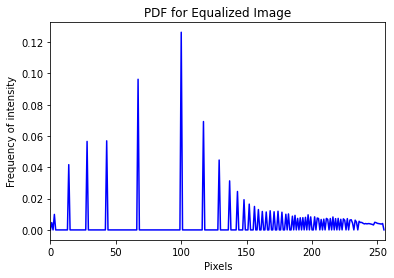

In [10]:
plt.plot(eq_pdf, color='b')
plt.xlim([0, 256])
plt.title('PDF for Equalized Image')
plt.xlabel('Pixels')
plt.ylabel('Frequency of intensity')
plt.show()

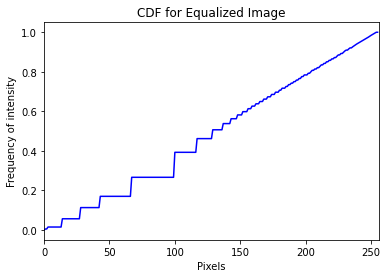

In [11]:
eq_cdf = create_cdf(eq_pdf)
plt.plot(eq_cdf, color='b')
plt.xlim([0, 256])
plt.title('CDF for Equalized Image')
plt.xlabel('Pixels')
plt.ylabel('Frequency of intensity')
plt.show()

In [12]:
cv2.imshow('Original Image', image)
cv2.imshow('Equalized Image', eq_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 

# A2) Otsu Image Thresholding

In [13]:
# READING THE THREE IMAGES
b2a = cv2.imread('b2_a.png', cv2.IMREAD_GRAYSCALE)
b2b = cv2.imread('b2_b.png', cv2.IMREAD_GRAYSCALE)
b2c = cv2.imread('b2_c.png', cv2.IMREAD_GRAYSCALE)

In [14]:
def manual_threshold(im_in, threshold):
    # Threshold image with the threshold of your choice
    manual_thresh_img = np.where(im_in > threshold, 255, 0).astype(np.uint8)
    return manual_thresh_img

In [15]:
def otsu_threshold(im_in):
    # Create Otsu thresholded image
    max_variance = 0
    otsu_threshold = 0
    for i in range(256):
        interclass_variance = calc_int_class_var(image,i)
        if interclass_variance > max_variance:
            max_variance = interclass_variance
            otsu_threshold = i
    otsu_thresh_img = np.where(im_in > otsu_threshold, 255, 0).astype(np.uint8)
    print("Otsu Threshold:",otsu_threshold)
    print("Max Variance:",max_variance)
    return otsu_thresh_img

In [16]:
def calc_int_class_var(image,threshold):
    background = image[image <= threshold]
    foreground = image[image > threshold]

    wb = len(background) / len(image)
    wf = len(foreground) / len(image)

    mean_b = np.mean(background)
    mean_f = np.mean(foreground)

    inter_class_variance = wb * wf * (mean_b - mean_f) ** 2

    return inter_class_variance

C:\Users\nidhu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\nidhu\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Otsu Threshold: 131
Max Variance: 94897019.82898921


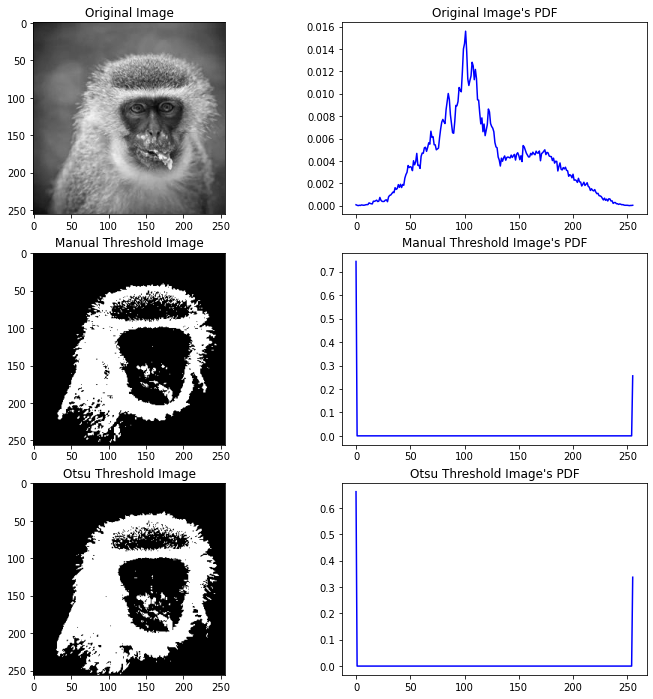

Manual Threshold: 150
Max Variance for Manual Threshold: 89609423.30666313


In [17]:
image = cv2.imread('b2_a.png', cv2.IMREAD_GRAYSCALE)

pdf_orig = create_pdf(image)

man_threshold = 150
man_thresh_img = manual_threshold(image, man_threshold)
pdf_man = create_pdf(man_thresh_img)

otsu_thresh_img = otsu_threshold(image)
pdf_otsu = create_pdf(otsu_thresh_img)

plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(3, 2, 2)
plt.plot(pdf_orig, color='b')
plt.title('Original Image\'s PDF')

plt.subplot(3, 2, 3)
plt.imshow(man_thresh_img, cmap='gray')
plt.title('Manual Threshold Image')

plt.subplot(3, 2, 4)
plt.plot(pdf_man, color='b')
plt.title('Manual Threshold Image\'s PDF')

plt.subplot(3, 2, 5)
plt.imshow(otsu_thresh_img, cmap='gray')
plt.title('Otsu Threshold Image')

plt.subplot(3, 2, 6)
plt.plot(pdf_otsu, color='b')
plt.title('Otsu Threshold Image\'s PDF')

plt.show()

print("Manual Threshold:",man_threshold)
print("Max Variance for Manual Threshold:", calc_int_class_var(image,man_threshold))
cv2.imshow('Manual Thresholding', man_thresh_img)
cv2.imshow('Otsu Thresholding', otsu_thresh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

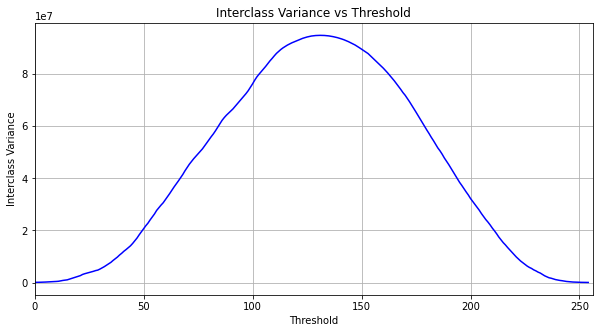

In [18]:
interclass_variance_list = [calc_int_class_var(image,i) for i in range(256)]
# print(interclass_variance_list)
plt.figure(figsize=(10, 5))
plt.plot(interclass_variance_list, color='b')
plt.xlim([0, 256])
plt.title('Interclass Variance vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Interclass Variance')
plt.grid(True)
plt.show()


# A3) Creative Part

Making Histogram Equalization for colour images

In [19]:
image = cv2.imread("personal2_Q1_color.jpg")
cv2.imshow('orig img', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
blue, green, red = cv2.split(image)
cv2.imshow('blue',blue)
cv2.imshow('green',green)
cv2.imshow('red',red)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
eq_blue = histogram_equalization(blue)
eq_green = histogram_equalization(green)
eq_red = histogram_equalization(red)

In [22]:
equalized_image = cv2.merge((eq_blue, eq_green, eq_red))

In [23]:
cv2.imwrite("personal2_Q1_color_eq.jpg", equalized_image)

# Display the original and equalized images using OpenCV
cv2.imshow("Original Image", image)
cv2.imshow("Equalized Image", equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

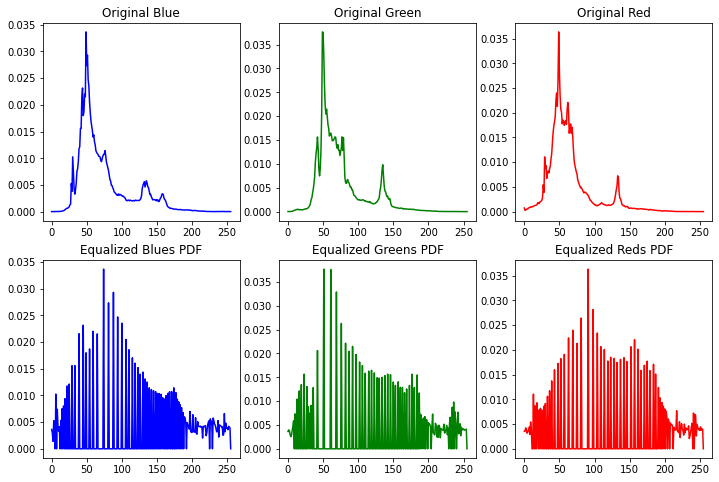

In [24]:
blue_pdf =  create_pdf(blue)
green_pdf =  create_pdf(green)
red_pdf =  create_pdf(red)

eq_blue_pdf =  create_pdf(eq_blue)
eq_green_pdf =  create_pdf(eq_green)
eq_red_pdf =  create_pdf(eq_red)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(blue_pdf, color='b')
plt.title('Original Blue')

plt.subplot(2, 3, 2)
plt.plot(green_pdf, color='g')
plt.title('Original Green')

plt.subplot(2, 3, 3)
plt.plot(red_pdf, color='r')
plt.title('Original Red')

plt.subplot(2, 3, 4)
plt.plot(eq_blue_pdf, color='b')
plt.title('Equalized Blues PDF')

plt.subplot(2, 3, 5)
plt.plot(eq_green_pdf, color='g')
plt.title('Equalized Greens PDF')

plt.subplot(2, 3, 6)
plt.plot(eq_red_pdf, color='r')
plt.title('Equalized Reds PDF')


plt.show()

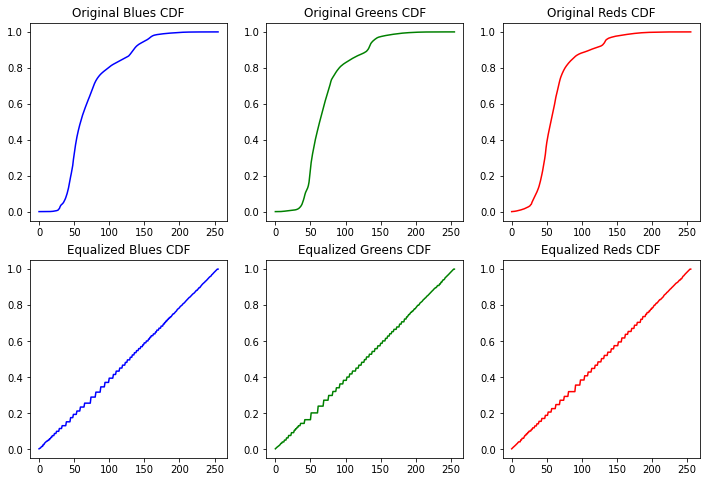

In [25]:
blue_cdf =  create_cdf(blue_pdf)
green_cdf =  create_cdf(green_pdf)
red_cdf =  create_cdf(red_pdf)

eq_blue_cdf =  create_cdf(eq_blue_pdf)
eq_green_cdf =  create_cdf(eq_green_pdf)
eq_red_cdf =  create_cdf(eq_red_pdf)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(blue_cdf, color='b')
plt.title('Original Blues CDF')

plt.subplot(2, 3, 2)
plt.plot(green_cdf, color='g')
plt.title('Original Greens CDF')

plt.subplot(2, 3, 3)
plt.plot(red_cdf, color='r')
plt.title('Original Reds CDF')

plt.subplot(2, 3, 4)
plt.plot(eq_blue_cdf, color='b')
plt.title('Equalized Blues CDF')

plt.subplot(2, 3, 5)
plt.plot(eq_green_cdf, color='g')
plt.title('Equalized Greens CDF')

plt.subplot(2, 3, 6)
plt.plot(eq_red_cdf, color='r')
plt.title('Equalized Reds CDF')

plt.show()